# Análisis de Muertes por Accidentes de Trabajo en Colombia

## Dataset Utilizado

Este análisis utiliza dos fuentes principales de datos:
- **Shapefile del DANE**: Contiene las delimitaciones geográficas de los 32 departamentos de Colombia, con información de códigos y nombres departamentales.
- **Estadísticas de Riesgos Laborales (2024)**: Dataset suministrado por el gobierno a través de la compañia "Positiva Compañía de Seguros S.A.", con 58,586 registros que incluyen variables como:
  - Número de trabajadores
  - Muertes reportadas por accidentes de trabajo
  - Nuevas pensiones por invalidez
  - Incapacidades permanentes

El período analizado corresponde a reportes del año 2024, sin embargo los datos fueron actualizados hasta este año 2025, con datos agregados a nivel departamental.

Aqui presento la fuente de donde ser suministraron los datos

https://www.datos.gov.co/Salud-y-Protecci-n-Social/Estad-sticas-Riesgos-Laborales-Positiva-2024/kwqa-xugj/about_data


Lo que queremos averiguar es ver en que departamento de colombia se presenta el mayor numero de accidentes laborales e intentar hallar una explicacion para dicha situación.

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings      

In [2]:
warnings.filterwarnings("ignore") 
shapefile_path = r"C:/Users/Administrador/Desktop/dataviz_2/COLOMBIA"
gdf = gpd.read_file(shapefile_path, encoding='utf-8')

In [3]:
df=pd.read_csv('C:/Users/Administrador/Desktop/dataviz_2/Estadísticas_Riesgos_Laborales_Positiva_2024_20250912.csv', encoding='utf-8')

In [4]:
df.head()

,DPTO_CNMBR,MPIO,CODIGO_DE_LA_ARL,AÑO_DE_INFORME,MES_DE_INFORME,ACTIVEC,RELA_DEP,RELA_INDEP,PRESUACCIDETRASUCE,MUERTES_REPOR_AT,NUEVAPENSIOINVA_R_AT,NUEVAPENSIOINVA_R_EL,INCAPERMAPARCIAR_AT,INCAPERMAPARCIAR_EL
0,ANTIOQUIA,MEDELLIN,1423,2025,5,1131201,22,0,0,0,0,0,0,0
1,ANTIOQUIA,MEDELLIN,1423,2025,5,1131202,10,0,0,0,0,0,0,0
2,ANTIOQUIA,MEDELLIN,1423,2025,5,1139301,0,0,0,0,0,0,0,0
3,ANTIOQUIA,MEDELLIN,1423,2025,5,1141001,695,45,1,1,1,0,0,0
4,ANTIOQUIA,MEDELLIN,1423,2025,5,1454101,300,2,2,2,2,0,0,0


In [5]:
gdf.head()

,OBJECTID,DPTO_CCDGO,DPTO_NANO_,DPTO_CNMBR,DPTO_CACTO,DPTO_NAREA,DPTO_CSMBL,DPTO_NANO,PAIS_PAIS_,SHAPE_Leng,SHAPE_Area,geometry
0,1,05,1886,ANTIOQUIA,Constitucion Politica de 1886,6.306333e+10,3,2005,1,21.137035,5.155783,"POLYGON ((-76.40481 8.85708, -76.4044 8.85625,..."
1,2,08,1910,ATLANTICO,Ley 21 de 1910,3.326730e+09,3,2005,2,2.461077,0.274825,"POLYGON ((-74.82969 11.04992, -74.82937 11.049..."
2,3,11,0,BOGOTA D.C.,None,1.633209e+09,3,2005,3,3.731288,0.133045,"POLYGON ((-74.07274 4.83565, -74.07217 4.83505..."
3,4,13,1886,BOLIVAR,Constitucion Politica de 1886,2.666559e+10,3,2005,4,15.706980,2.191055,"MULTIPOLYGON (((-75.24966 10.79804, -75.24926 ..."
4,5,15,1886,BOYACA,Constitucion Politica de 1886,2.307705e+10,3,2005,5,15.280968,1.883315,"POLYGON ((-72.01129 7.00944, -72.01029 7.00912..."


DPTO_CNMBR, MPIO → ubicación 

CODIGO_DE_LA_ARL → código de la ARL que reporta.

AÑO_DE_INFORME, MES_DE_INFORME → período de reporte.

ACTIVEC → código de la actividad económica.

RELA_DEP, RELA_INDEP → número de trabajadores dependientes e independientes reportados.

PRESUACCIDETRASUCE → presuntos accidentes de trabajo sucedidos.

MUERTES_REPOR_AT → muertes reportadas por accidente de trabajo.

NUEVAPENSIOINVA_R_AT, NUEVAPENSIOINVA_R_EL → nuevas pensiones de invalidez.

INCAPERMAPARCIAR_AT, INCAPERMAPARCIAR_EL → incapacidades permanentes parciales.

In [6]:
df.shape

(58586, 14)

In [7]:
df.isnull().sum()

DPTO_CNMBR              0
MPIO                    0
CODIGO_DE_LA_ARL        0
AÑO_DE_INFORME          0
MES_DE_INFORME          0
ACTIVEC                 0
RELA_DEP                0
RELA_INDEP              0
PRESUACCIDETRASUCE      0
MUERTES_REPOR_AT        0
NUEVAPENSIOINVA_R_AT    0
NUEVAPENSIOINVA_R_EL    0
INCAPERMAPARCIAR_AT     0
INCAPERMAPARCIAR_EL     0
dtype: int64

Notamos que no presentamos ningun tipo de nulos

In [8]:
def sum_por_departamento(df, column_name):
    return df.groupby('DPTO_CNMBR')[column_name].sum().reset_index()
df_sum = sum_por_departamento(df, 'MUERTES_REPOR_AT')
df_sum.head(33)

,DPTO_CNMBR,MUERTES_REPOR_AT
0,AMAZONAS,11
1,ANTIOQUIA,1476
2,ARAUCA,54
3,ATLANTICO,179
4,BOGOTA,2372
5,BOLIVAR,142
6,BOYACA,511
7,CALDAS,252
8,CAQUETA,93
9,CASANARE,232


Lo que hicimos fue que por departamento, sumamos el numero total de accidentes y lo metemos en un dataframe llamado df_sum

In [9]:
munic_1 = df_sum["DPTO_CNMBR"]
munic_1

0            AMAZONAS
1           ANTIOQUIA
2              ARAUCA
3           ATLANTICO
4              BOGOTA
5             BOLIVAR
6              BOYACA
7              CALDAS
8             CAQUETA
9            CASANARE
10              CAUCA
11              CESAR
12              CHOCO
13            CORDOBA
14       CUNDINAMARCA
15            GUAINIA
16           GUAVIARE
17              HUILA
18         LA GUAJIRA
19          MAGDALENA
20               META
21    N. DE SANTANDER
22             NARIÑO
23           PUTUMAYO
24            QUINDIO
25          RISARALDA
26         SAN ANDRES
27          SANTANDER
28              SUCRE
29             TOLIMA
30    VALLE DEL CAUCA
31             VAUPES
32            VICHADA
Name: DPTO_CNMBR, dtype: object

In [10]:
munic_2 = gdf['DPTO_CNMBR']
munic_2

0                      ANTIOQUIA
1                      ATLANTICO
2                    BOGOTA D.C.
3                        BOLIVAR
4                         BOYACA
5                         CALDAS
6                        CAQUETA
7                          CAUCA
8                          CESAR
9                        CORDOBA
10                  CUNDINAMARCA
11                         CHOCO
12                         HUILA
13                    LA GUAJIRA
14                     MAGDALENA
15                          META
16                        NARI?O
17            NORTE DE SANTANDER
18                       QUINDIO
19                     RISARALDA
20                     SANTANDER
21                         SUCRE
22                        TOLIMA
23               VALLE DEL CAUCA
24                        ARAUCA
25                      CASANARE
26                      PUTUMAYO
27                      AMAZONAS
28                       GUAINIA
29                      GUAVIARE
30        

In [11]:
df_sum['DPTO_CNMBR'].replace({'N. DE SANTANDER': 'NORTE SANTANDER', 'VALLE DEL CAUCA':'VALLE'}, inplace=True)

In [12]:
gdf['DPTO_CNMBR'].replace({'NARI?O': 'NARIÑO', 'NORTE DE SANTANDER': 'NORTE SANTANDER', 'BOGOTA D.C.':'BOGOTA', 'ARCHIPIELAGO DE SAN ANDRES': 'SAN ANDRES', 'VALLE DEL CAUCA':'VALLE'}, inplace=True)

In [13]:
mal_car = ['á', 'é', 'í', 'ó', 'ú', 'ñ', 'ü']  # Caracteres que queremos cambiar
bien_car = ['a', 'e', 'i', 'o', 'u', 'n', 'u'] # Caracteres por los que queremos cambiar

for j in range(len(mal_car)): # Este for recorre cada elemento de cada municipio reemplazando los caracteres malos
    munic_1 = munic_1.str.replace(mal_car[j], bien_car[j]).str.lower() # Reemplazamos los caracteres
                                                                           # y los ponemos en minúscula
munic_1.head(32)

0            amazonas
1           antioquia
2              arauca
3           atlantico
4              bogota
5             bolivar
6              boyaca
7              caldas
8             caqueta
9            casanare
10              cauca
11              cesar
12              choco
13            cordoba
14       cundinamarca
15            guainia
16           guaviare
17              huila
18         la guajira
19          magdalena
20               meta
21    norte santander
22             narino
23           putumayo
24            quindio
25          risaralda
26         san andres
27          santander
28              sucre
29             tolima
30              valle
31             vaupes
Name: DPTO_CNMBR, dtype: object

In [14]:
mal_car = ['á', 'é', 'í', 'ó', 'ú', 'ñ', 'ü']  # Caracteres que queremos cambiar
bien_car = ['a', 'e', 'i', 'o', 'u', 'n', 'u'] # Caracteres por los que queremos cambiar

for j in range(len(mal_car)): # Este for recorre cada elemento de cada municipio reemplazando los caracteres malos
    munic_2 = munic_2.str.replace(mal_car[j], bien_car[j]).str.lower() # Reemplazamos los caracteres
                                                                           # y los ponemos en minúscula
munic_2.head(32)

0           antioquia
1           atlantico
2              bogota
3             bolivar
4              boyaca
5              caldas
6             caqueta
7               cauca
8               cesar
9             cordoba
10       cundinamarca
11              choco
12              huila
13         la guajira
14          magdalena
15               meta
16             narino
17    norte santander
18            quindio
19          risaralda
20          santander
21              sucre
22             tolima
23              valle
24             arauca
25           casanare
26           putumayo
27           amazonas
28            guainia
29           guaviare
30             vaupes
31            vichada
Name: DPTO_CNMBR, dtype: object

In [15]:
def normalidad_kstest(data):
    from scipy import stats
    import numpy as np

    data = data.dropna()  # Eliminar valores nulos
    estadistico, p_valor = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))

    alpha = 0.05  # Nivel de significancia

    if p_valor > alpha:
        print("No se rechaza la hipótesis nula: Los datos siguen una distribución normal (p-valor =", p_valor, ")")
    else:
        print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal (p-valor =", p_valor, ")")
        
normalidad_kstest(df_sum['MUERTES_REPOR_AT'])

Se rechaza la hipótesis nula: Los datos no siguen una distribución normal (p-valor = 0.017569096167462273 )


In [16]:
munic_1

0            amazonas
1           antioquia
2              arauca
3           atlantico
4              bogota
5             bolivar
6              boyaca
7              caldas
8             caqueta
9            casanare
10              cauca
11              cesar
12              choco
13            cordoba
14       cundinamarca
15            guainia
16           guaviare
17              huila
18         la guajira
19          magdalena
20               meta
21    norte santander
22             narino
23           putumayo
24            quindio
25          risaralda
26         san andres
27          santander
28              sucre
29             tolima
30              valle
31             vaupes
32            vichada
Name: DPTO_CNMBR, dtype: object

In [17]:
munic_2

0           antioquia
1           atlantico
2              bogota
3             bolivar
4              boyaca
5              caldas
6             caqueta
7               cauca
8               cesar
9             cordoba
10       cundinamarca
11              choco
12              huila
13         la guajira
14          magdalena
15               meta
16             narino
17    norte santander
18            quindio
19          risaralda
20          santander
21              sucre
22             tolima
23              valle
24             arauca
25           casanare
26           putumayo
27           amazonas
28            guainia
29           guaviare
30             vaupes
31            vichada
32         san andres
Name: DPTO_CNMBR, dtype: object

Aqui verificamos que si se hayan hecho los cambios correctos en la digitación de el nombre de los departamentos, para asi aplicar el Merge de manera correcta.

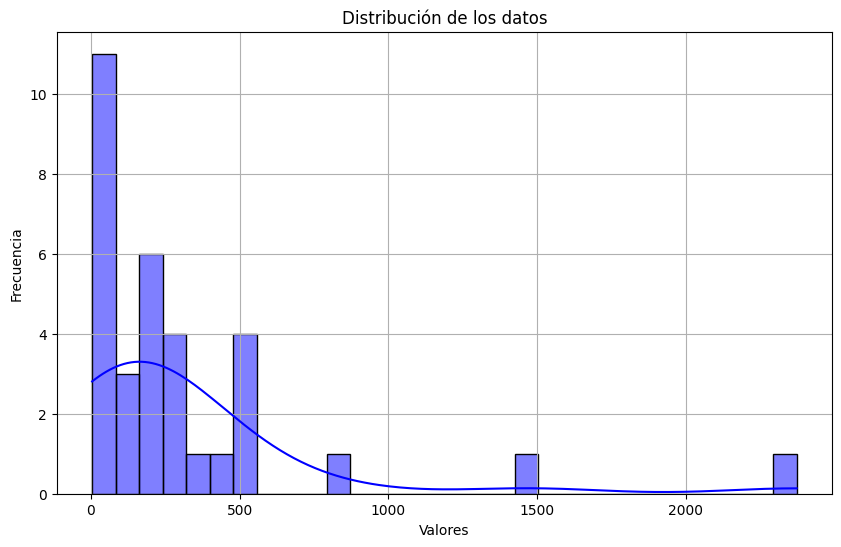

In [18]:
def distribucion_graficar(data):
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, bins=30, color='blue')
    plt.title('Distribución de los datos')
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.grid()
    plt.show()
    
distribucion_graficar(df_sum['MUERTES_REPOR_AT'])

In [19]:
df_sum["DPTO_CNMBR"] = munic_1
gdf['DPTO_CNMBR'] = munic_2

In [20]:
Datos_tot = pd.merge(gdf, df_sum, on ='DPTO_CNMBR', how = 'outer')

In [21]:
Datos_tot.head()

,OBJECTID,DPTO_CCDGO,DPTO_NANO_,DPTO_CNMBR,DPTO_CACTO,DPTO_NAREA,DPTO_CSMBL,DPTO_NANO,PAIS_PAIS_,SHAPE_Leng,SHAPE_Area,geometry,MUERTES_REPOR_AT
0,28,91,1991,amazonas,Decreto 2274 del 4 de Octubre de la Constituci...,1.100465e+11,3,2005,28,24.747842,8.921607,"POLYGON ((-71.29212 0.06821, -71.28829 0.06762...",11
1,1,05,1886,antioquia,Constitucion Politica de 1886,6.306333e+10,3,2005,1,21.137035,5.155783,"POLYGON ((-76.40481 8.85708, -76.4044 8.85625,...",1476
2,25,81,1991,arauca,5 de Julio Constitucion Politica de 1991,2.380556e+10,3,2005,25,9.162939,1.940327,"POLYGON ((-70.67671 7.09263, -70.67666 7.09251...",54
3,2,08,1910,atlantico,Ley 21 de 1910,3.326730e+09,3,2005,2,2.461077,0.274825,"POLYGON ((-74.82969 11.04992, -74.82937 11.049...",179
4,3,11,0,bogota,None,1.633209e+09,3,2005,3,3.731288,0.133045,"POLYGON ((-74.07274 4.83565, -74.07217 4.83505...",2372


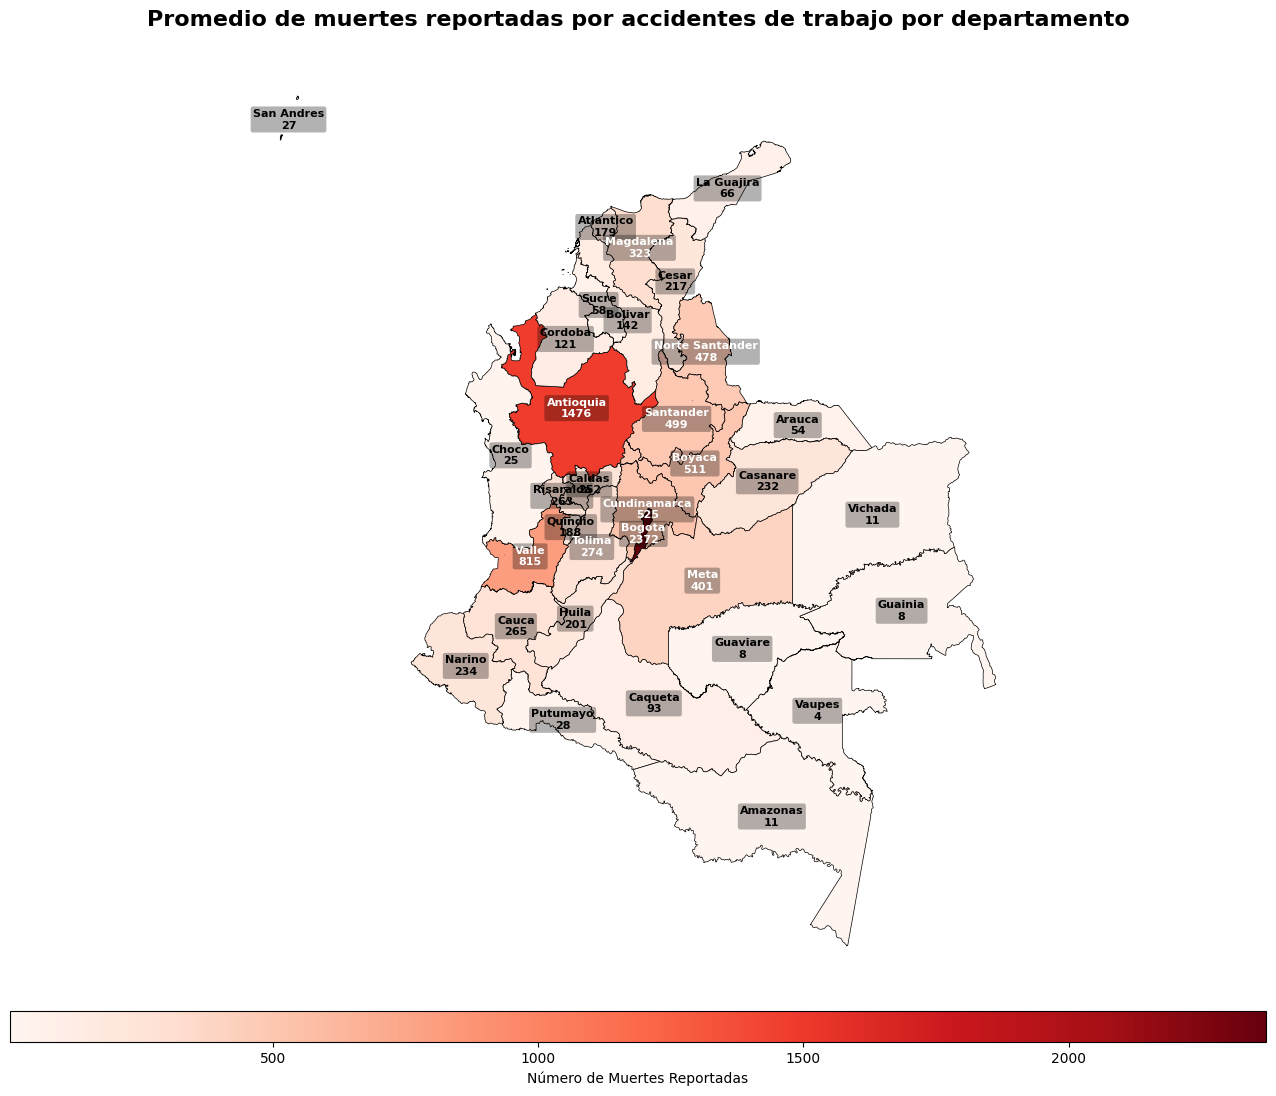

In [22]:
# === 1) Calcular el promedio por departamento en df ===
promedios = Datos_tot.groupby("DPTO_CNMBR")["MUERTES_REPOR_AT"].mean().reset_index()

# === 2) Unir con la geometría (gdf) ===
geo_promedios = gdf.merge(promedios, on="DPTO_CNMBR", how="left")

# === 3) Función para graficar ===
def mapa(data, columna, titulo):
    fig, ax = plt.subplots(1, 1, figsize=(16, 12))
    
    # Crear mapa con escala de rojos
    data.plot(column=columna, 
              ax=ax, 
              legend=True,
              cmap='Reds',  # Escala de rojos
              edgecolor='black',
              linewidth=0.5,
              legend_kwds={
                  'label': 'Número de Muertes Reportadas',
                  'orientation': "horizontal",
                  'shrink': 0.8,
                  'pad': 0.02,
                  'aspect': 40
              })
    
    # Añadir nombres de departamentos y número de muertes
    for idx, row in data.iterrows():
        centroid = row.geometry.centroid
        dept_name = row['DPTO_CNMBR'].title()
        muertes = row[columna]
        
        # Determinar color de texto basado en el fondo (mejor contraste)
        text_color = 'black' if muertes < data[columna].quantile(0.7) else 'white'
        
        ax.text(centroid.x, centroid.y, f"{dept_name}\n{muertes:.0f}", 
                fontsize=8, 
                ha='center', 
                va='center',
                color=text_color,
                weight='bold',
                bbox=dict(facecolor='black', alpha=0.3, boxstyle='round,pad=0.2', edgecolor='none'))
    
    plt.title(titulo, fontsize=16, fontweight='bold', pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# === 4) Graficar usando el GeoDataFrame con promedios ===
mapa(geo_promedios, 'MUERTES_REPOR_AT', 'Promedio de muertes reportadas por accidentes de trabajo por departamento')

Distribución desigual:

Notamos que en Bogotá, Antioquia y Valle del Cauca se enconcentran los valores más altos de muertes laborales, esto coincide con ser las regiones más industrializadas y pobladas del país.

Desigualdades territoriales evidentes:

Los departamentos amazónicos (Amazonas, Vaupés, Guainía) muestran valores mínimos, lo cual demuestra que existe una clara división entre regiones urbanas e industrializadas con las regiones rurales.

Posibles factores explicativos:

Concentración industrial y manufacturera

Densidad poblacional y volumen de trabajadores

Diferencias en implementación de normas de seguridad laboral

Variaciones en los sectores económicos predominantes

Patrón regional:

La región Andina muestra valores consistentemente más altos

La región Pacífica y Caribe presentan valores medios

La Amazonía y Orinoquía tienen los valores más bajos

Ahora bien, para tener mayor orden, vamos a dividirlos por intervalos 

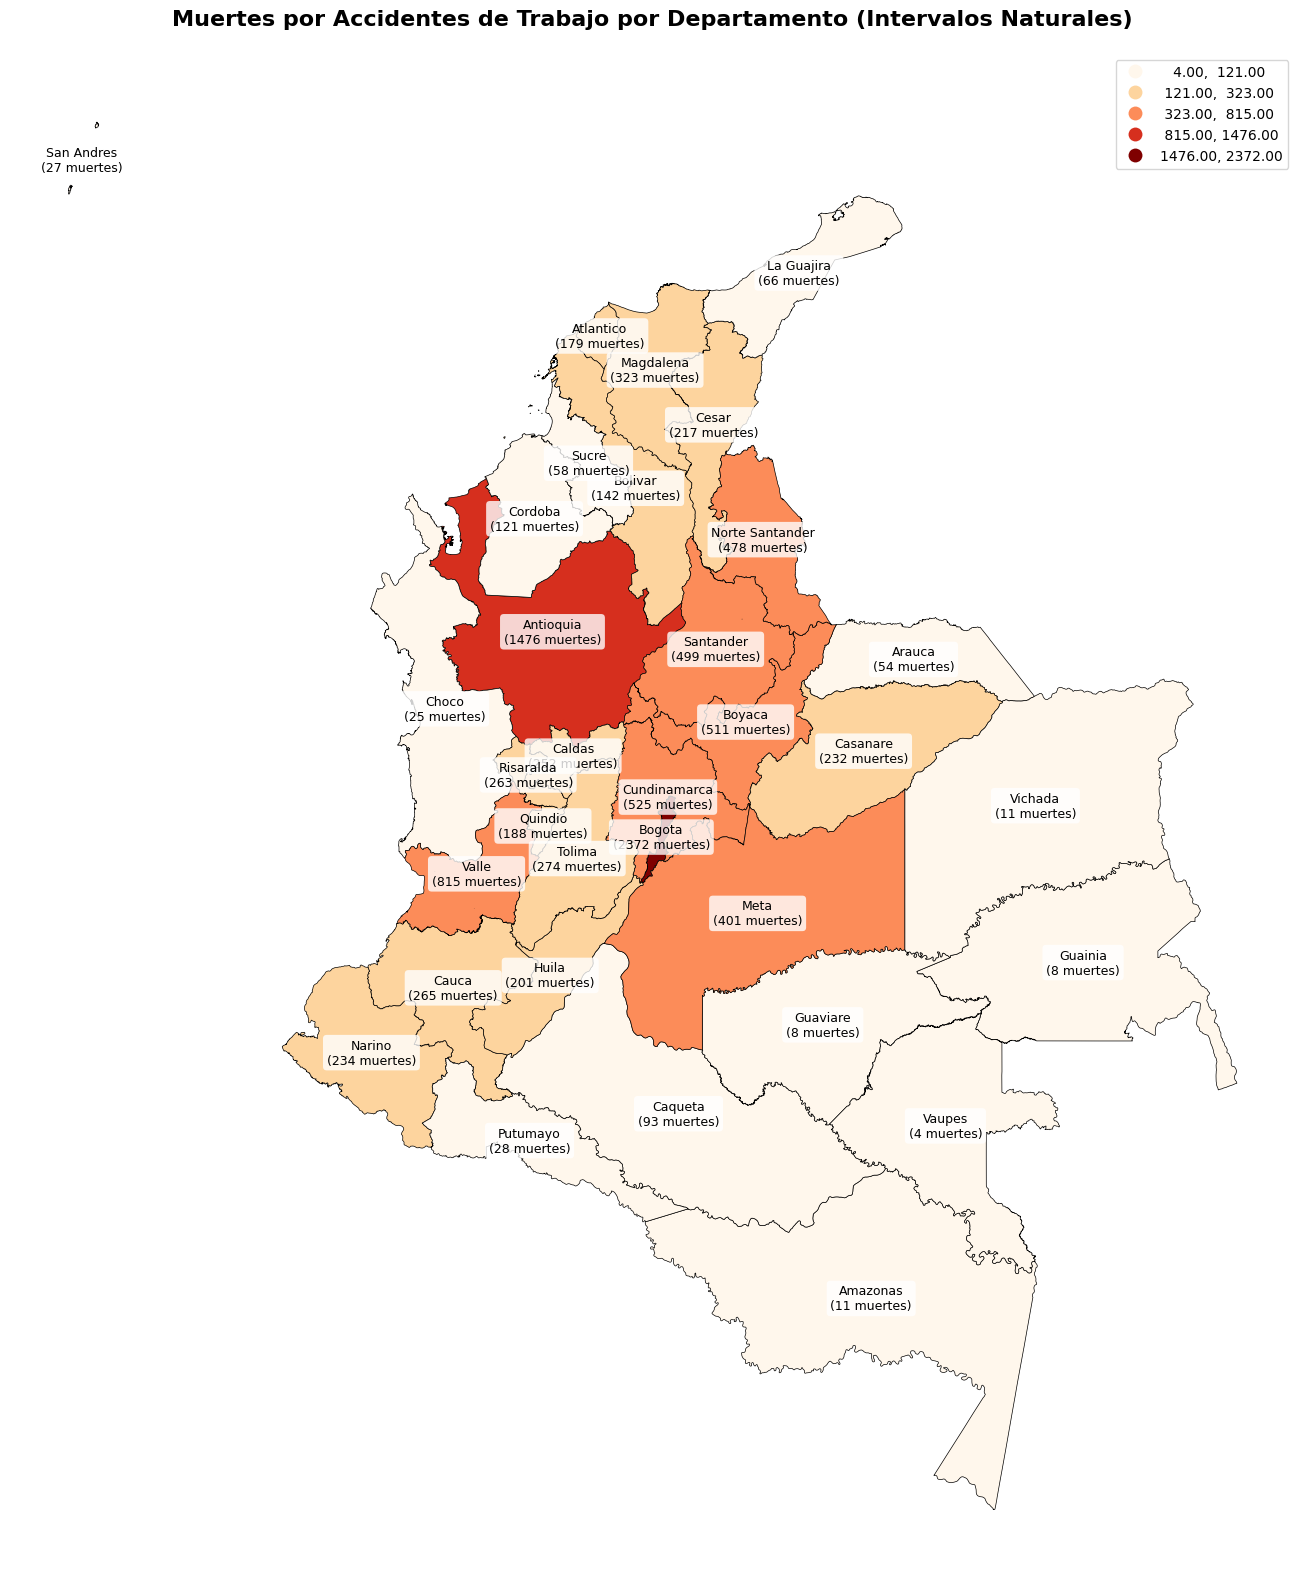

In [23]:
plt.rcParams['font.family'] = 'DejaVu Sans'  

fig, ax = plt.subplots(1, 1, figsize=(20, 16))  

# Mapa coroplético
Datos_tot.plot(column='MUERTES_REPOR_AT', 
               cmap='OrRd', 
               scheme='NaturalBreaks', 
               legend=True, 
               ax=ax,
               edgecolor='black',
               linewidth=0.5)

# Añadir nombres de departamentos y número de muertes
for idx, row in Datos_tot.iterrows():
    centroid = row.geometry.centroid
    dept_name = row['DPTO_CNMBR'].title()
    muertes = row['MUERTES_REPOR_AT']
    
    # Crear texto con nombre y muertes
    texto = f"{dept_name}\n({muertes} muertes)"
    
    # Añadir texto al mapa con mejor espaciado
    ax.text(centroid.x, centroid.y, texto, 
            fontsize=9, 
            ha='center', 
            va='center',
            linespacing=1.2,  
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3', edgecolor='none'))

ax.set_title('Muertes por Accidentes de Trabajo por Departamento (Intervalos Naturales)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_axis_off()  # Ocultar ejes

plt.tight_layout()
plt.show()

In [24]:
# Definir las regiones de Colombia
regiones = {
    'ANDINA': ['antioquia', 'cundinamarca', 'santander', 'boyaca', 'huila', 
               'tolima', 'caldas', 'quindio', 'risaralda', 'norte santander', 
               'bogota', 'narino'],
    'CARIBE': ['atlantico', 'bolivar', 'cesar', 'cordoba', 'la guajira', 
               'magdalena', 'sucre', 'san andres'],
    'PACIFICA': ['valle', 'cauca', 'choco'],
    'AMAZONICA': ['amazonas', 'caqueta', 'guainia', 'guaviare', 'putumayo', 
                  'vaupes'],
    'ORINOQUIA': ['arauca', 'casanare', 'meta', 'vichada']
}

# Función para calcular porcentaje de muertes por región
def porcentaje_muertes_por_region(df, region_nombre, departamentos_region):
    # Filtrar el DataFrame para incluir solo los departamentos de la región
    df_region = df[df['DPTO_CNMBR'].isin(departamentos_region)]
    
    # Calcular el total de muertes en la región
    total_muertes_region = df_region['MUERTES_REPOR_AT'].sum()
    
    # Calcular el total de muertes en todo el país
    total_muertes_pais = df['MUERTES_REPOR_AT'].sum()
    
    # Calcular el porcentaje de muertes en la región respecto al total del país
    porcentaje = (total_muertes_region / total_muertes_pais) * 100
    
    return porcentaje, total_muertes_region

# Calcular y mostrar los resultados para cada región
print("PORCENTAJE DE MUERTES POR REGIÓN:")
print("=" * 50)

for region, departamentos in regiones.items():
    porcentaje, total = porcentaje_muertes_por_region(Datos_tot, region, departamentos)
    print(f"{region}: {porcentaje:.2f}% ({total} muertes)")

# Calcular el total general para verificación
total_muertes = Datos_tot['MUERTES_REPOR_AT'].sum()
print(f"\nTOTAL NACIONAL: {total_muertes} muertes")

PORCENTAJE DE MUERTES POR REGIÓN:
ANDINA: 70.20% (7273 muertes)
CARIBE: 10.94% (1133 muertes)
PACIFICA: 10.66% (1105 muertes)
AMAZONICA: 1.47% (152 muertes)
ORINOQUIA: 6.74% (698 muertes)

TOTAL NACIONAL: 10361 muertes


## Evaluación de Resultados

Los mapas coropléticos que se han creado muestran patrones importantes en la distribución geográfica de las muertes laborales:

### Dispersión geográfica
- **Concentración alta**: Los valores absolutos más altos corresponden a Valle del Cauca (815), Antioquia (1,476) y Bogotá (2,372).
- **Incidencia media**: Las cifras de departamentos como Bolívar (142), Cundinamarca (525) y Santander (499) son intermedias.
- **Baja incidencia**: Las cifras más reducidas se encuentran en los departamentos de la Amazonía (Guainía: 8, Amazonas: 11, Vaupés: 4).


### Tendencias por región
Es notoria una división territorial:

- **Región Andina**: El 70 % de las muertes reportadas pertenecen a esta región.
- **Regiones del Pacífico y el Caribe**: Valores promedio, a excepción de los de Magdalena (323) y el Atlántico (179).
- **Zona Amazónica**: Presencia mínima, abarcando menos del 2% de la totalidad nacional.

### Componentes explicativos
Esta distribución es equivalente a:
- Número de habitantes y tamaño de la fuerza laboral
- Concentración de actividades industriales y de manufactura
- Existencia de sectores que tienen un alto riesgo (minería, manufactura y construcción)

## Relevancia de la georreferenciación en investigaciones sociales

El análisis espacial por medio de georreferenciación muestra su importancia esencial:

2.  **Priorización de intervenciones**: Permite identificar áreas críticas para centrar recursos y políticas públicas en materia de seguridad laboral.

3.  **Entendimiento de contextos regionales**: Los patrones espaciales contribuyen a comprender la manera en que los problemas sociales se ven afectados por elementos geográficos, culturales y económicos.

4.  **Comunicación efectiva**: Los mapas comunican datos complejos de forma intuitiva, lo que ayuda a los actores públicos y privados a tomar decisiones.

5.  **Análisis multivariable**: El análisis causal se beneficia de la incorporación de datos demográficos, económicos y sociales con la variable en cuestión.

**Conclusión**: La georreferenciación se establece como un instrumento esencial para convertir datos en información que pueda ser utilizada, mostrando no solo dónde tienen lugar los problemas, sino también indicando por qué persisten ciertos patrones de desigualdad territorial.